<a href="https://colab.research.google.com/github/ReyhaneNikoobayan/violence-Detection/blob/main/3dCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
from tqdm import tqdm

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Update paths to your dataset in Google Drive
violence = '/content/drive/My Drive/RLVS/Real Life Violence Dataset/Violence'
non_violence = '/content/drive/MyDrive/RLVS/Real Life Violence Dataset/NonViolence'

# 3. Function to read exactly 50 evenly spaced frames from each video
def read_videos_from_folder(folder_path, label):
    videos = []
    labels = []
    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith(".mp4"):
            video_path = os.path.join(folder_path, filename)
            cap = cv2.VideoCapture(video_path)
            frames = []
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            if total_frames < 30:
                print(f"Skipping {filename}: only {total_frames} frames.")
                cap.release()
                continue
            frame_indices = [int(i * total_frames / 30) for i in range(30)]
            frame_count = 0
            index_set = set(frame_indices)
            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break
                if frame_count in index_set:
                    resized_frame = cv2.resize(frame, (112, 112))
                    frames.append(resized_frame)
                    if len(frames) == 30:
                        break
                frame_count += 1
            cap.release()
            if len(frames) == 30:
                videos.append(frames)
                labels.append(label)
            else:
                print(f"Skipped {filename}: collected {len(frames)} frames.")
    return videos, labels

# 4. Read videos
videos_violence_RLVS, labels_violence_RLVS = read_videos_from_folder(violence, 'violence')
videos_non_violence_RLVS, labels_non_violence_RLVS = read_videos_from_folder(non_violence, 'non_violence')

# 5. Combine and summarize
all_videos_RLVS = videos_violence_RLVS + videos_non_violence_RLVS
all_labels_RLVS = labels_violence_RLVS + labels_non_violence_RLVS



print(f"✅ Total videos RLVS loaded: {len(all_videos_RLVS)}")



Mounted at /content/drive


  7%|▋         | 69/1000 [00:18<01:05, 14.23it/s]

Skipping NV_940.mp4: only 29 frames.


100%|██████████| 1000/1000 [01:59<00:00,  8.34it/s]

✅ Total videos RLVS loaded: 1835


In [ ]:
import cv2
import os
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
from tqdm import tqdm

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Update paths to your dataset in Google Drive
train_violence = '/content/drive/My Drive/RWF2000/RWF-2000/train/Fight'
train_non_violence='/content/drive/My Drive/RWF2000/RWF-2000/train/NonFight'
val_violence= '/content/drive/My Drive/RWF2000/RWF-2000/val/Fight'
val_non_violence = '/content/drive/My Drive/RWF2000/RWF-2000/val/NonFight'

# 3. Function to read exactly 30 evenly spaced frames from each video
def read_videos_from_folder(folder_path, label):
    videos = []
    labels = []
    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith(".avi"):
            video_path = os.path.join(folder_path, filename)
            cap = cv2.VideoCapture(video_path)
            frames = []
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            if total_frames < 30:
                print(f"Skipping {filename}: only {total_frames} frames.")
                cap.release()
                continue
            frame_indices = [int(i * total_frames / 30) for i in range(30)]
            frame_count = 0
            index_set = set(frame_indices)
            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break
                if frame_count in index_set:
                    resized_frame = cv2.resize(frame, (112, 112))
                    frames.append(resized_frame)
                    if len(frames) == 30:
                        break
                frame_count += 1
            cap.release()
            if len(frames) == 30:
                videos.append(frames)
                labels.append(label)
            else:
                print(f"Skipped {filename}: collected {len(frames)} frames.")
    return videos, labels

# 4. Read videos
videos_violence_RWF_train, labels_violence_RWF_train = read_videos_from_folder(train_violence, 'violence')
videos_non_violence_RWF_train, labels_non_violence_RWF_train = read_videos_from_folder(train_non_violence, 'non_violence')

videos_violence_RWF_val, labels_violence_RWF_val = read_videos_from_folder(val_violence, 'violence')
videos_non_violence_RWF_val, labels_non_violence_RWF_val = read_videos_from_folder(val_non_violence, 'non_violence')


# 5. Combine and summarize
all_videos_train_RWF = videos_violence_RWF_train + videos_non_violence_RWF_train
all_labels_train_RWF = labels_violence_RWF_train+ labels_non_violence_RWF_train

all_videos_val_RWF = videos_violence_RWF_val + videos_non_violence_RWF_val
all_labels_val_RWF= labels_violence_RWF_val+ labels_non_violence_RWF_val



print(f"✅ Total RwF train_videos loaded: {len(all_videos_train_RWF)}")
print(f"✅ Total RWF val_videos loaded: {len(all_videos_val_RWF)}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


100%|██████████| 200/200 [01:19<00:00,  2.51it/s]

✅ Total RwF train_videos loaded: 1599
✅ Total RWF val_videos loaded: 400


In [ ]:
# Print the mapping of labels to their numerical values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {np.str_('non_violence'): np.int64(0), np.str_('violence'): np.int64(1)}


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Assume you have your labels in a list or array
# For example, labels could be something like this:
# all_labels = ['violence', 'non-violence', 'violence', ...]

# Convert your video list and label list to numpy arrays for easier splitting
all_videos_RLVS = np.array(all_videos_RLVS)
all_videos_train_RWF= np.array(all_videos_train_RWF)
all_videos_val_RWF = np.array(all_videos_val_RWF)

all_labels_RLVS = np.array(all_labels_RLVS)  # Use the string labels
all_labels_train_RWF = np.array(all_labels_train_RWF)
all_labels_val_RWF= np.array(all_labels_val_RWF)




# Encode the string labels to integer labels
label_encoder = LabelEncoder()

all_labels_RLVS_encoded = label_encoder.fit_transform(all_labels_RLVS)
all_labels_train_RWF_encoded = label_encoder.fit_transform(all_labels_train_RWF)
all_labels_val_RWF_encoded = label_encoder.fit_transform(all_labels_val_RWF)



# Split into training (80%) and val (20%)
all_videos_train_RLVS, all_videos_val_RLVS, all_labels_train_RLVS,all_labels_val_RLVS = train_test_split(
    all_videos_RLVS, all_labels_RLVS_encoded, test_size=0.2, random_state=42, shuffle=True)



print(f"Training videos RLVS: {len(all_videos_train_RLVS)}")
print(f"Validation videos RLVS: {len(all_videos_val_RLVS)}")

print(f"Training videos RWF: {len(all_videos_train_RWF)}")
print(f"Validation videos RWF: {len(all_videos_val_RWF)}")






Training videos RLVS: 1468
Validation videos RLVS: 367
Training videos RWF: 1599
Validation videos RWF: 400


In [ ]:
import numpy as np
from sklearn.utils import shuffle

# Combine training sets
combined_videos_train = np.concatenate((all_videos_train_RLVS, all_videos_train_RWF))
combined_labels_train = np.concatenate((all_labels_train_RLVS, all_labels_train_RWF_encoded))  # Make sure both are encoded

# Combine validation sets
combined_videos_val = np.concatenate((all_videos_val_RLVS, all_videos_val_RWF))
combined_labels_val = np.concatenate((all_labels_val_RLVS, all_labels_val_RWF_encoded))  # Make sure both are encoded

# Shuffle training data
x_train, labels_train = shuffle(combined_videos_train, combined_labels_train, random_state=42)

# Shuffle validation data
x_val, labels_val = shuffle(combined_videos_val, combined_labels_val, random_state=42)

# Check sizes
print(f"Total training videos: {len(x_train)}")
print(f"Total validation videos: {len(x_val)}")


Total training videos: 3067
Total validation videos: 767


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class VideoDataset(Dataset):
    def __init__(self, videos, labels):
        self.videos = videos
        self.labels = labels

    def __len__(self):
        return len(self.videos)

    def __getitem__(self, idx):
        video = self.videos[idx]
        label = self.labels[idx]
        video = video / 255.0
        # Convert to tensors
        video = torch.tensor(video, dtype=torch.float32)
        label = torch.tensor(label, dtype=torch.long)
        return video, label

# Create datasets
train_dataset = VideoDataset(x_train, labels_train)
val_dataset = VideoDataset(x_val, labels_val)
test_dataset_RLVS = VideoDataset(all_videos_val_RLVS, all_labels_val_RLVS)
test_dataset_RWF = VideoDataset(all_videos_val_RWF, all_labels_val_RWF_encoded)

# Create data loaders
batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader_RLVS = DataLoader(test_dataset_RLVS, batch_size=batch_size, shuffle=False)
test_loader_RWF= DataLoader(test_dataset_RWF, batch_size=batch_size, shuffle=False)

# Print the sizes of the datasets
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size RLVS: {len(test_dataset_RLVS)}")
print(f"Test set size RWF: {len(test_dataset_RWF)}")

# Example of iterating through the data loader
for videos, labels in train_loader:
    print(videos.shape, labels.shape)
    break


Training set size: 3067
Validation set size: 767
Test set size RLVS: 367
Test set size RWF: 400
torch.Size([16, 30, 112, 112, 3]) torch.Size([16])


Epoch 1/10, Train Loss: 1.3261, Train Accuracy: 55.95%, Val Loss: 0.2750, Val Accuracy: 74.39%
Epoch 2/10, Train Loss: 0.6180, Train Accuracy: 66.61%, Val Loss: 0.2529, Val Accuracy: 76.29%
Epoch 3/10, Train Loss: 0.5442, Train Accuracy: 70.82%, Val Loss: 0.2344, Val Accuracy: 78.75%
Epoch 4/10, Train Loss: 0.4663, Train Accuracy: 77.67%, Val Loss: 0.2049, Val Accuracy: 80.11%
Epoch 5/10, Train Loss: 0.3368, Train Accuracy: 84.09%, Val Loss: 0.2228, Val Accuracy: 79.02%
Epoch 6/10, Train Loss: 0.1800, Train Accuracy: 92.37%, Val Loss: 0.3614, Val Accuracy: 77.66%
Epoch 7/10, Train Loss: 0.0952, Train Accuracy: 96.58%, Val Loss: 0.3247, Val Accuracy: 81.47%
Epoch 8/10, Train Loss: 0.0417, Train Accuracy: 98.40%, Val Loss: 0.5163, Val Accuracy: 81.20%
Epoch 9/10, Train Loss: 0.0454, Train Accuracy: 98.63%, Val Loss: 0.4266, Val Accuracy: 83.92%
Epoch 10/10, Train Loss: 0.0224, Train Accuracy: 99.25%, Val Loss: 0.6087, Val Accuracy: 82.02%


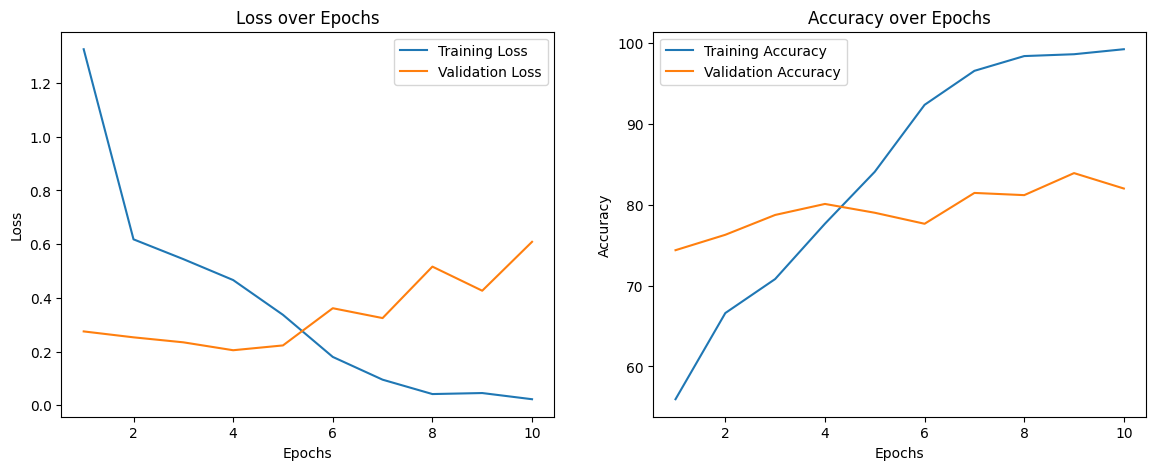

NameError: name 'test_loader' is not defined

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

class Video3DCNN(nn.Module):
    def __init__(self):
        super(Video3DCNN, self).__init__()
        self.conv1 = nn.Conv3d(in_channels=3, out_channels=64, kernel_size=(3, 3, 3), stride=1, padding=1)
        self.pool1 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2))
        self.conv2 = nn.Conv3d(in_channels=64, out_channels=128, kernel_size=(3, 3, 3), stride=1, padding=1)
        self.pool2 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=2)
        self.conv3 = nn.Conv3d(in_channels=128, out_channels=256, kernel_size=(3, 3, 3), stride=1, padding=1)
        self.pool3 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=2)

        # Adjust this value based on actual output dimensions from the last pooling layer
        self.flatten_dim = 256 * 7 * 14 * 14  # Example calculation, adjust as needed
        self.fc1 = nn.Linear(self.flatten_dim, 1024)  # Adjust based on your input dimensions
        self.fc2 = nn.Linear(1024, 2)  # Assuming binary classification

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        #print(f'After conv1 and pool1: {x.shape}')
        x = self.pool2(F.relu(self.conv2(x)))
        #print(f'After conv2 and pool2: {x.shape}')
        x = self.pool3(F.relu(self.conv3(x)))
        #print(f'After conv3 and pool3: {x.shape}')

        # Use reshape instead of view
        x = x.reshape(-1, self.flatten_dim)
        #print(f'After reshaping: {x.shape}')

        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Instantiate the model, define the loss function and the optimizer
model = Video3DCNN()
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize lists to store loss and accuracy
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
num_epochs = 10  # Set the number of epochs

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for videos, labels in train_loader:
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        videos, labels = videos.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the parameter gradients

        outputs = model(videos.permute(0, 4, 1, 2, 3))  # Permute to (N, C, D, H, W)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100 * correct / total)

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for videos, labels in test_loader_RLVS:
            videos, labels = videos.to(device), labels.to(device)

            outputs = model(videos.permute(0, 4, 1, 2, 3))
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct / total)

    print(f"Epoch {epoch + 1}/{num_epochs}, "
          f"Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, "
          f"Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracies[-1]:.2f}%")

# Plotting loss and accuracy
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(14, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.show()

# Test loop and confusion matrix
model.eval()
test_loss = 0.0
correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for videos, labels in test_loader_RWF:
        videos, labels = videos.to(device), labels.to(device)

        outputs = model(videos.permute(0, 4, 1, 2, 3))
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

print(f"Test Loss: {test_loss / len(test_loader)}, Accuracy: {100 * correct / total}%")

# Plot confusion matrix
cm = confusion_matrix(all_labels, all_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['nonviolence', 'violence'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
class Video3DCNN(nn.Module):
    def __init__(self):
        super(Video3DCNN, self).__init__()
        self.conv1 = nn.Conv3d(in_channels=3, out_channels=64, kernel_size=(3, 3, 3), stride=1, padding=1)
        self.pool1 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2))
        self.conv2 = nn.Conv3d(in_channels=64, out_channels=128, kernel_size=(3, 3, 3), stride=1, padding=1)
        self.pool2 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=2)
        self.conv3 = nn.Conv3d(in_channels=128, out_channels=256, kernel_size=(3, 3, 3), stride=1, padding=1)
        self.pool3 = nn.MaxPool3d(kernel_size=(2, 2, 2), stride=2)

        # Adjust this value based on actual output dimensions from the last pooling layer
        self.flatten_dim = 256 * 7 * 14 * 14  # Example calculation, adjust as needed
        self.fc1 = nn.Linear(self.flatten_dim, 1024)  # Adjust based on your input dimensions
        self.fc2 = nn.Linear(1024, 2)  # Assuming binary classification

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        #print(f'After conv1 and pool1: {x.shape}')
        x = self.pool2(F.relu(self.conv2(x)))
        #print(f'After conv2 and pool2: {x.shape}')
        x = self.pool3(F.relu(self.conv3(x)))
        #print(f'After conv3 and pool3: {x.shape}')

        # Use reshape instead of view
        x = x.reshape(-1, self.flatten_dim)
        #print(f'After reshaping: {x.shape}')

        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
model = Video3DCNN()
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')

total_params = count_parameters(model)
print(f"Total trainable parameters: {total_params:,}")

def get_model_size(model):
    param_size = 0
    for param in model.parameters():
        param_size += param.nelement() * param.element_size()
    buffer_size = 0
    for buffer in model.buffers():
        buffer_size += buffer.nelement() * buffer.element_size()
    size_all_mb = (param_size + buffer_size) / 1024**2
    return size_all_mb

model_size_mb = get_model_size(model)
print(f"Model size: {model_size_mb:.2f} MB")

Total trainable parameters: 360,776,194
Model size: 1376.25 MB
